<a href="https://colab.research.google.com/github/statrav/pages/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B3%80%EC%88%98%20%EC%83%9D%EC%84%B1%20%EA%B3%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 PyTorch Libarary import

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models

import PIL
import matplotlib.pyplot as plt

import copy

In [2]:
# GPU 장치 사용 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# 이미지를 불러오고 다운받아서, Tensor 객체로 변환하는 함수
def image_loader(img_path, imsize):
  loader = transforms.Compose([
      transforms.Resize(imsize), # 이미지의 크기를 imsize로 변경
      transforms.ToTensor() # 이미지를 torch.Tensor 형식으로 변경 [0, 255] → [0, 1]
  ])
  image = PIL.Image.open(img_pth) # 이미지 가져오기 (PIL : Python Image Library)
  image = loader(image).unsqueeze(0) # 가져온 이미지에 Batch 목적의 차원(dimension)을 추가
  return image.to(device, torch.float) # GPU로 올리기

In [4]:
# torch.Tensor 형태의 이미지를 출력하는 함수
def imshow(tensor):
  image = tensor.cpu().clone() # matplotlib은 CPU 기반이므로, CPU로 옮김
  image = image.squeeze(0) # torch.Tensor에서 사용되는 Batch 목적의 차원(dimension) 제거 (↔ unsqueeze)
  image = transforms.ToPILImage()(image) # PIL객체로 변경
  plt.imshow(image) # 이미지 출력
  plt.show()

In [5]:
# git에서 소스코드 다운로드하여 실습용 이미지 가져오기
!git clone https://github.com/ndb796/Deep-Learning-Paper-Review-and-Practice
%cd Deep-Learning-Paper-Review-and-Practice

Cloning into 'Deep-Learning-Paper-Review-and-Practice'...
remote: Enumerating objects: 462, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 462 (delta 72), reused 190 (delta 65), pack-reused 261
Receiving objects: 100% (462/462), 53.82 MiB | 11.96 MiB/s, done.
Resolving deltas: 100% (152/152), done.
/content/Deep-Learning-Paper-Review-and-Practice


In [11]:
## Image Reconstruction

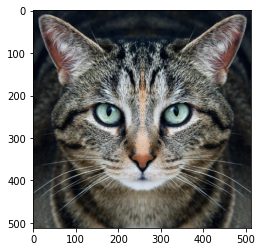

In [9]:
# 목표 이미지 (target image) 불러오기
img_pth = './code_practices/images/cat.jpg'
target_image = image_loader(img_pth, (512, 512))
imshow(target_image)

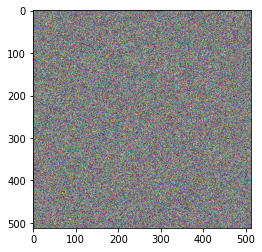

In [10]:
# Target Image와 동일한 크기의 Noise Image 생성
noise = torch.empty_like(target_image).uniform_(0, 1).to(device) # Tensor객체를 device 함수를 통해 GPU 장치로 올려줌 # uniform_(0, 1) : (0, 1) 사이의 균일분포
imshow(noise)

In [15]:
loss = nn.MSELoss() # loss 함수를 MSE로 설정
iters = 100 # 반복(iteration) 횟수 설정
lr = 1e4 # Gradient를 구한 뒤, 얼마만큼씩 update를 할 것인지를 지정하기 위한 learning rate

[ Start ]


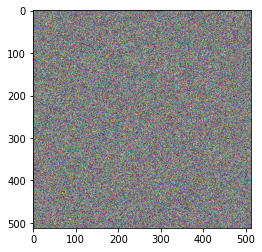

[ Step : 10 ]
Loss: 0.10423342883586884


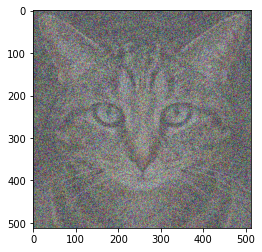

[ Step : 20 ]
Loss: 0.06226672977209091


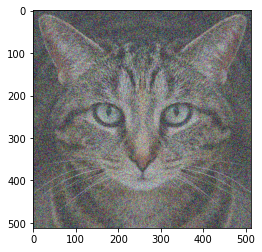

[ Step : 30 ]
Loss: 0.03719675913453102


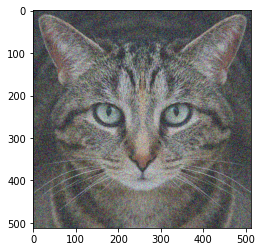

[ Step : 40 ]
Loss: 0.022220514714717865


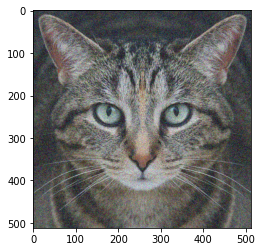

[ Step : 50 ]
Loss: 0.013274041935801506


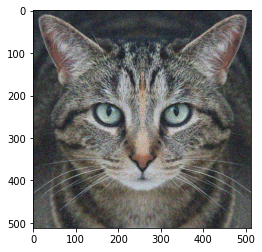

[ Step : 60 ]
Loss: 0.00792961660772562


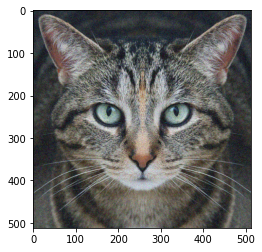

[ Step : 70 ]
Loss: 0.004736976232379675


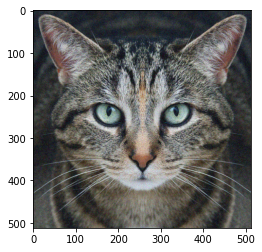

[ Step : 80 ]
Loss: 0.0028297645039856434


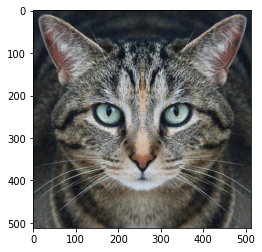

[ Step : 90 ]
Loss: 0.001690438250079751


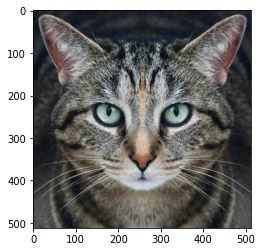

[ Step : 100 ]
Loss: 0.0010098302736878395


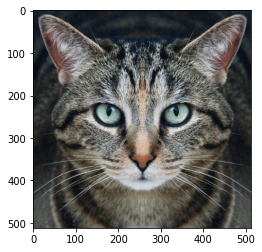

In [16]:
print("[ Start ]")
imshow(noise)

for i in range(iters):
  noise.requires_grad = True # iteration 할 때마다 noise tensor의 gradient를 추적
  output = loss(noise, target_image)
  output.backward() # loss 함수에 대하여 미분한 후, 기울기(gradient) 계산 → requries_grad = True 로 설정된 모든 Tensor에 대한 gradient 계산

  # 계산된 기울기(gradient)를 이용하여 loss함수가 감소하는 방향으로 업데이트
  gradient = lr * noise.grad # 업데이트를 위한 gradient 생성 (learning rate를 곱해줌)


  # clamp(min, prefered, max) : 최소, 최대, 선호값 지정 
  # 선호값 : noise에서 gradient를 뺀 값 → 다시 noise 변수로 들어감
  noise = torch.clamp((noise - gradient), min=0, max=1).detach_() # 연산 추적을 중단하기 위해 detach() 호출 → 어차피 iteration이 반복되면서 requires_grad = True 단계로 올라가 추적이 재 실행됨

  if ( i + 1) % 10 == 0 :
    print(f'[ Step : {i+1} ]')
    print(f'Loss: {output}')
    imshow(noise)
